In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import MinMaxScaler

# File path to the dataset in Google Drive
file_path = '/content/drive/My Drive/vehicle/car_data.csv'

# Load the dataset
vehicle_data = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Display the first few rows of the dataset
print(vehicle_data.head())

# Check the dataset's shape
print("Shape of the dataset:", vehicle_data.shape)

# Display summary statistics
print(vehicle_data.describe())

# Check unique values for categorical features
for column in vehicle_data.select_dtypes(include='object'):
    print(column, ":", vehicle_data[column].unique())


  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
Shape of the dataset: (301, 9)
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.0000

In [ ]:
# Check for missing values
missing_values = vehicle_data.isnull().sum()
print("Missing Values:\n", missing_values)



Missing Values:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [ ]:
# Identify columns with non-numeric values
non_numeric_columns = vehicle_data.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['Fuel_Type_Diesel_True_True', 'Fuel_Type_Petrol_True_True',
       'Seller_Type_Individual_True_True', 'Transmission_Manual_True_True'],
      dtype='object')


In [ ]:
# Handle non-numeric columns
# For categorical variables, we can use one-hot encoding
for column in non_numeric_columns:
    if vehicle_data[column].nunique() <= 10:
        vehicle_data = pd.get_dummies(vehicle_data, columns=[column], drop_first=True)
    else:
        vehicle_data.drop(column, axis=1, inplace=True)

# Split the dataset into features (X) and target variable (y)
X = vehicle_data.drop('Selling_Price', axis=1)  # Assuming 'Selling_Price' is the target variable
y = vehicle_data['Selling_Price']

In [ ]:
# Remove duplicate rows
vehicle_data.drop_duplicates(inplace=True)

Correlation Matrix:
                            Year  Selling_Price  Present_Price  Kms_Driven  \
Year                    1.000000       0.234369      -0.053563   -0.525714   
Selling_Price           0.234369       1.000000       0.876378    0.028566   
Present_Price          -0.053563       0.876378       1.000000    0.205253   
Kms_Driven             -0.525714       0.028566       0.205253    1.000000   
Owner                  -0.181639      -0.087880       0.009947    0.089367   
Fuel_Type_Diesel        0.056469       0.543541       0.464849    0.173295   
Fuel_Type_Petrol       -0.052197      -0.531636      -0.456746   -0.173595   
Seller_Type_Individual -0.036820      -0.553851      -0.511686   -0.101030   
Transmission_Manual     0.003434      -0.348869      -0.334265   -0.163881   

                           Owner  Fuel_Type_Diesel  Fuel_Type_Petrol  \
Year                   -0.181639          0.056469         -0.052197   
Selling_Price          -0.087880          0.543541     

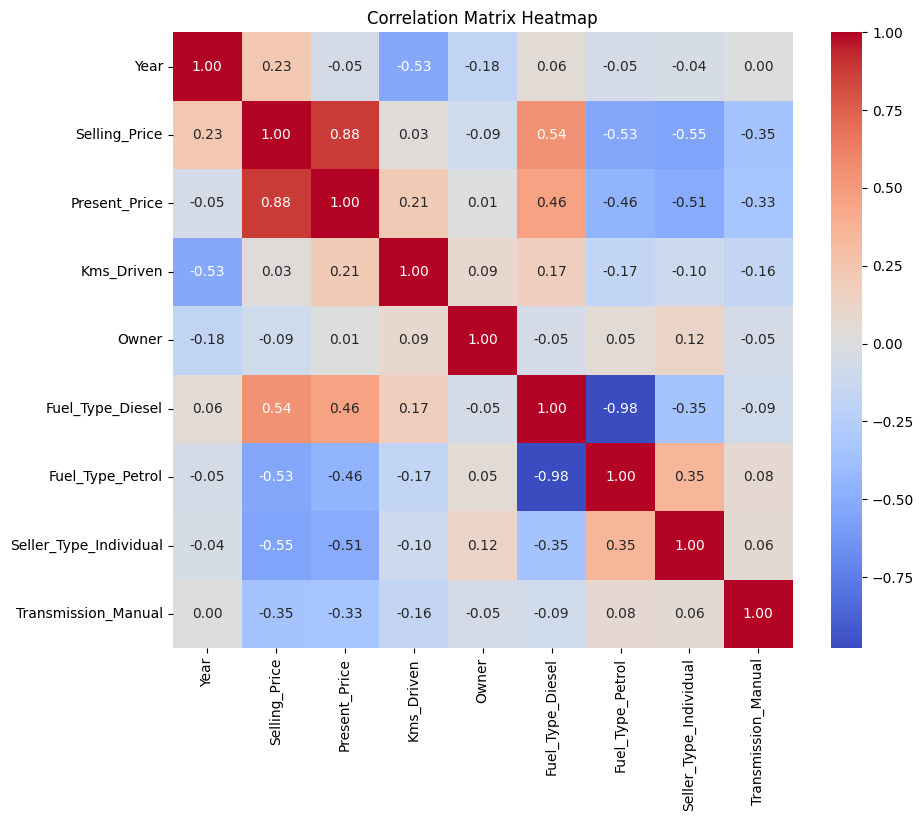

In [ ]:
# Check for multicollinearity among features using correlation matrix
# For multicollinearity, you may also consider using VIF (Variance Inflation Factor)
correlation_matrix = vehicle_data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# You can also visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = vehicle_data.drop('Selling_Price', axis=1)  # Assuming 'Selling_Price' is the target variable
y = vehicle_data['Selling_Price']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define numerical and categorical features using selector function
numerical_features = selector(dtype_include=np.number)(X)
categorical_features = selector(dtype_exclude=np.number)(X)

In [ ]:
# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
# Append estimator to preprocessing pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

In [ ]:
# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_regression, k=5)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Normalization using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

In [ ]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Present_Price',
                                                   'Kms_Driven', 'Owner']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Fuel_Type_Diesel',
                                                   'Fuel_Type_Petrol',
                                                   'Seller_Type_Individual',
                                                   'Transmission_Manual'])])),
                ('regressor', LinearRegression())])

In [ ]:
# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Training R^2:", train_r2)
print("Testing R^2:", test_r2)

Training MSE: 2.3293050888492344
Testing MSE: 6.370752956823239
Training RMSE: 1.5262061095570396
Testing RMSE: 2.524035054594773
Training R^2: 0.9049453218243146
Testing R^2: 0.7528154215832931


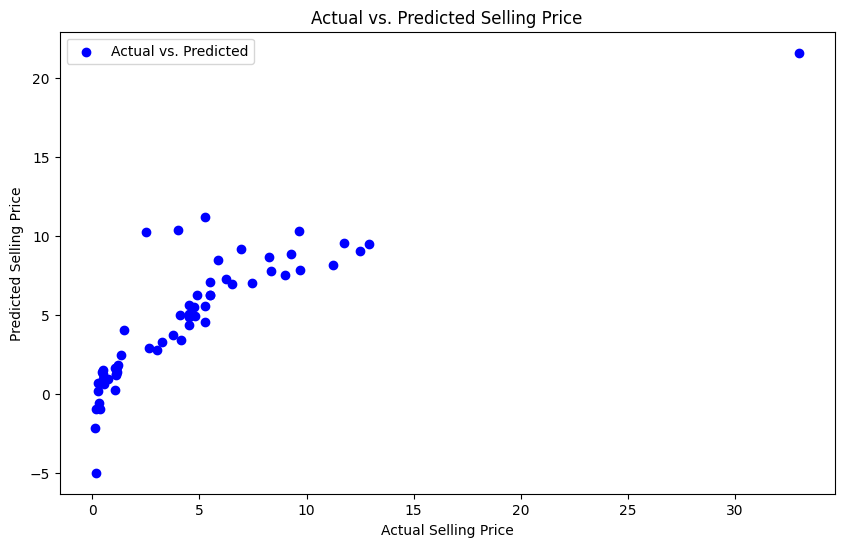

In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Actual vs. Predicted')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Price')
plt.legend()
plt.show()

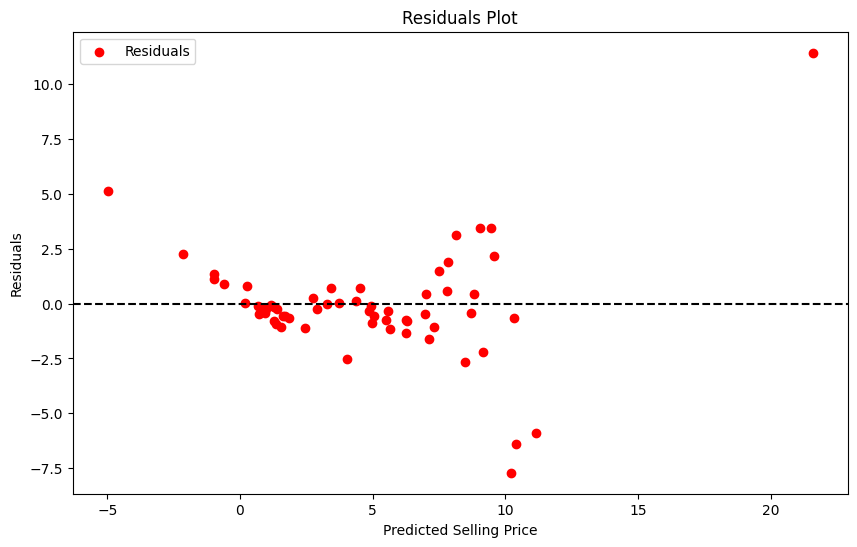

In [ ]:
# Visualize residuals
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, color='red', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Selling Price')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()